<a href="https://colab.research.google.com/github/anshikatyagi23/Machine-Learning/blob/main/Building_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.



In [1]:
#importing numpy library
import numpy as np

Linear Regression

In [21]:
#importing numpy library
import numpy as np

# Linear Regression
class Linear_Regression():
  #initiating the parameters(learning rate& no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    # Initialize w and b here as well, although they will be re-initialized in fit.
    # This prevents potential errors if predict is called before fit.
    self.w = None
    self.b = None


  def fit(self, X, Y):

    #number of training examples & number of features
    self.m, self.n = X.shape

    #initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0

    self.X = X
    self.Y = Y

    #implementing Gradient descent
    for i in range(self.no_of_iterations):
       self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)

    #calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):
    # Ensure w and b are initialized before predicting
    if self.w is None or self.b is None:
        raise ValueError("Model has not been trained. Call the 'fit' method first.")
    return X.dot(self.w) + self.b

# Using Linear Regression model for Prediction
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Pre-Processing
salary_data = pd.read_csv('/content/salary_data.csv')

salary_data.head()

salary_data.tail()

salary_data.shape

#checking null values
salary_data.isnull().sum()

# Splitting the feature and target
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

print(X)

print(Y)

# Splitting the dataset into training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

# Training the Linear Regression model
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

# Now call the fit method to train the model
# model.fit(X_train, Y_train) # This line was not in the original traceback but is the next logical step


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


Using Linear Regression model for Prediction

In [22]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



Data Pre-Processing

In [23]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [24]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [11]:
salary_data.shape

(30, 2)

In [12]:
#checking null values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature and target

In [13]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [14]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [15]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


Splitting the dataset into training & test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

Training the Linear Regression model

In [25]:

model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)


In [26]:

model.fit(X_train, Y_train)

In [28]:

# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


Predict the salary value for test data

In [29]:

test_data_prediction = model.predict(X_test)

In [30]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


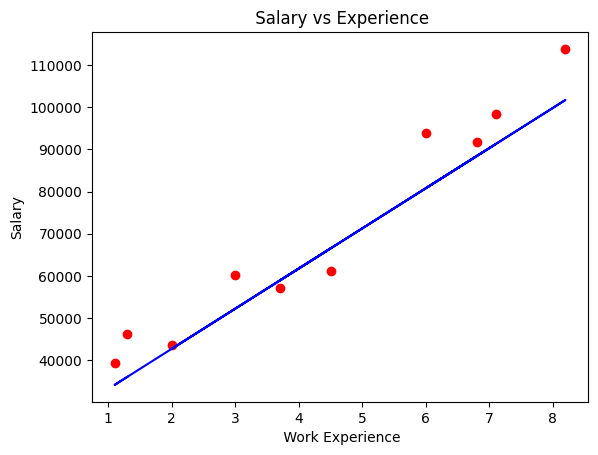

In [31]:
#Visualizing the predicted values & actual Values
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()
